#ORIGINAL                                   
 CLOF Algorithm -
1. Clustering
2. Outlier Set
3. LOF
*Large Data Set with More Complexity*
#VERSION 1
 P-CLOF Algorithm -
1. PCA
2. Clustering
3. Outlier Set
4. LOF
*Complexity reduced but includes False Positives*
#VERSION 2
 P-CLOF Algorithm with SVM -
1. PCA
2. Clustering
3. Outlier Set
4. LOF
*Expected Reduction in False Positives*
#VERSION 3
1. PCA
2. Ensemble Learning
2. Clustering
3. Outlier Set
4. LOF

# PROPER CLUSTERING ON INTERPOLATED DATA
#NUMBER of CLUSTERS 5


In [ ]:
#KMEANS CLUSTERING
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/Ananya Trupti Fatima Major Project/datasets/modified_data_interpolated (1).csv"

In [ ]:
data=pd.read_csv(path)

In [ ]:
data

,FLAG,01-01-2016,10-01-2016,11-01-2016,12-01-2016,13-01-2016,14-01-2016,15-01-2016,16-01-2016,17-01-2016,...,28-09-2016.1,29-09-2016.1,03-09-2016.1,30-09-2016.1,04-09-2016.1,05-09-2016.1,06-09-2016.1,07-09-2016.1,08-09-2016.1,09-09-2016.1
0,1,9.20,12.65,6.72,6.69,9.13,8.42,8.47,11.65,9.76,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,1,11.07,15.18,11.65,12.53,13.68,13.04,13.81,10.39,12.49,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
2,1,19.55,25.90,24.50,30.66,24.89,26.68,26.94,26.86,27.29,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
3,1,5.57,5.18,4.52,4.26,4.30,4.68,4.03,5.54,5.18,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31
4,1,4.86,3.43,2.55,3.25,3.83,2.77,3.45,3.31,3.28,...,2.82,5.52,3.12,3.13,4.20,3.23,3.85,2.78,3.55,2.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8108,0,26.69,25.86,36.84,30.52,29.96,32.76,34.92,30.36,27.36,...,12.71,10.20,10.90,13.15,17.30,19.81,16.44,20.33,14.88,11.33
8109,0,4.38,4.25,4.26,4.16,4.21,4.58,4.74,4.26,4.11,...,5.19,4.55,4.72,6.14,4.13,4.12,4.23,3.63,2.49,3.38
8110,0,20.67,17.11,19.69,22.32,18.41,20.76,22.01,17.19,21.77,...,7.98,8.58,7.25,6.14,6.79,7.60,3.55,6.38,10.34,10.79
8111,0,15.24,19.69,28.20,30.64,14.58,18.57,16.74,26.51,36.23,...,23.69,21.15,15.47,14.53,12.44,26.31,20.30,18.35,25.03,14.73


In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8113 entries, 0 to 8112
Columns: 609 entries, FLAG to 09-09-2016.1
dtypes: float64(608), int64(1)
memory usage: 37.7 MB


,FLAG,01-01-2016,10-01-2016,11-01-2016,12-01-2016,13-01-2016,14-01-2016,15-01-2016,16-01-2016,17-01-2016,...,28-09-2016.1,29-09-2016.1,03-09-2016.1,30-09-2016.1,04-09-2016.1,05-09-2016.1,06-09-2016.1,07-09-2016.1,08-09-2016.1,09-09-2016.1
count,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000,...,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000
mean,0.436707,16.378342,17.095962,16.827743,17.744515,17.672017,17.768281,17.758166,17.407722,17.172249,...,15.897589,17.369983,21.197769,18.887707,21.771521,22.991785,23.454444,22.817155,22.306556,21.813648
std,0.496008,147.597743,168.507476,193.268072,191.653673,194.711511,182.414156,174.023444,164.349304,157.665011,...,109.671304,121.526350,198.167899,132.279486,211.887929,227.157850,266.732451,234.302101,226.652080,241.772911
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.670000,1.650000,1.570000,1.640000,1.630000,1.600000,1.590000,1.630000,1.650000,...,1.600000,1.960000,1.960000,2.050000,1.950000,2.080000,2.080000,2.040000,2.040000,2.070000
50%,0.000000,6.180000,6.270000,5.970000,5.970000,6.070000,6.110000,6.140000,6.230000,6.300000,...,5.650000,6.060000,6.540000,6.300000,6.790000,6.700000,6.790000,6.670000,6.500000,6.500000
75%,1.000000,12.590000,12.830000,12.140000,12.420000,12.510000,12.700000,12.790000,13.010000,13.120000,...,12.010000,12.170000,14.430000,12.580000,15.300000,15.430000,15.690000,15.190000,14.290000,13.720000
max,1.000000,10440.000000,12780.000000,15780.000000,14580.000000,15330.000000,13500.000000,12840.000000,11730.000000,11550.000000,...,6324.000000,6990.000000,14640.000000,6672.000000,16320.000000,17100.000000,21210.000000,17940.000000,16710.000000,18570.000000


In [ ]:
df=data    #here i am creating new data frame 'df' for Clustering, so that flag labelled data is safe in 'data'
df.head()

,FLAG,01-01-2016,10-01-2016,11-01-2016,12-01-2016,13-01-2016,14-01-2016,15-01-2016,16-01-2016,17-01-2016,...,28-09-2016.1,29-09-2016.1,03-09-2016.1,30-09-2016.1,04-09-2016.1,05-09-2016.1,06-09-2016.1,07-09-2016.1,08-09-2016.1,09-09-2016.1
0,1,9.20,12.65,6.72,6.69,9.13,8.42,8.47,11.65,9.76,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,1,11.07,15.18,11.65,12.53,13.68,13.04,13.81,10.39,12.49,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
2,1,19.55,25.90,24.50,30.66,24.89,26.68,26.94,26.86,27.29,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
3,1,5.57,5.18,4.52,4.26,4.30,4.68,4.03,5.54,5.18,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31
4,1,4.86,3.43,2.55,3.25,3.83,2.77,3.45,3.31,3.28,...,2.82,5.52,3.12,3.13,4.20,3.23,3.85,2.78,3.55,2.54


In [ ]:
#df = df.drop("FLAG", axis=1)
df.head()

,01-01-2016,10-01-2016,11-01-2016,12-01-2016,13-01-2016,14-01-2016,15-01-2016,16-01-2016,17-01-2016,18-01-2016,...,28-09-2016.1,29-09-2016.1,03-09-2016.1,30-09-2016.1,04-09-2016.1,05-09-2016.1,06-09-2016.1,07-09-2016.1,08-09-2016.1,09-09-2016.1
0,9.20,12.65,6.72,6.69,9.13,8.42,8.47,11.65,9.76,5.74,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,11.07,15.18,11.65,12.53,13.68,13.04,13.81,10.39,12.49,12.35,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
2,19.55,25.90,24.50,30.66,24.89,26.68,26.94,26.86,27.29,16.67,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
3,5.57,5.18,4.52,4.26,4.30,4.68,4.03,5.54,5.18,4.64,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31
4,4.86,3.43,2.55,3.25,3.83,2.77,3.45,3.31,3.28,3.07,...,2.82,5.52,3.12,3.13,4.20,3.23,3.85,2.78,3.55,2.54


In [ ]:
inertia_values = [] # Create a list to store inertia values for different numbers of clusters
# Try different values of k (e.g., 1-10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)
inertia_values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[212829093025.17902,
 66560848183.84343,
 28344355769.7533,
 20154925330.300854,
 15175879963.66413,
 11889946744.959051,
 10575072538.964458,
 9125245201.142176,
 8206681725.419166,
 7356375763.41478]

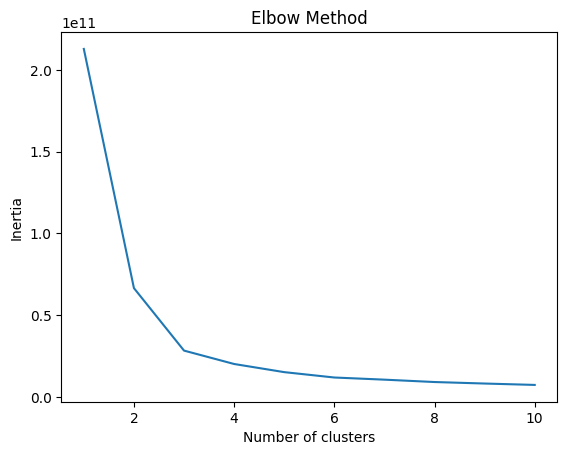

In [ ]:
# Plot the inertia values against the number of clusters
plt.plot(range(1, 11), inertia_values)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()
# Look for the "elbow" point in the plot,
# where the inertia starts decreasing less rapidly. number of clusters =4

In [ ]:
k=5
kmeans = KMeans(n_clusters=k, init="k-means++") #kmeans object
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
y_kmeans = kmeans.predict(df)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
cluster_labels = kmeans.labels_
cluster_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
df['cluster_label'] = kmeans.labels_
df

,01-01-2016,10-01-2016,11-01-2016,12-01-2016,13-01-2016,14-01-2016,15-01-2016,16-01-2016,17-01-2016,18-01-2016,...,29-09-2016.1,03-09-2016.1,30-09-2016.1,04-09-2016.1,05-09-2016.1,06-09-2016.1,07-09-2016.1,08-09-2016.1,09-09-2016.1,cluster_label
0,9.20,12.65,6.72,6.69,9.13,8.42,8.47,11.65,9.76,5.74,...,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92,0
1,11.07,15.18,11.65,12.53,13.68,13.04,13.81,10.39,12.49,12.35,...,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92,0
2,19.55,25.90,24.50,30.66,24.89,26.68,26.94,26.86,27.29,16.67,...,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92,0
3,5.57,5.18,4.52,4.26,4.30,4.68,4.03,5.54,5.18,4.64,...,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31,0
4,4.86,3.43,2.55,3.25,3.83,2.77,3.45,3.31,3.28,3.07,...,5.52,3.12,3.13,4.20,3.23,3.85,2.78,3.55,2.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8108,26.69,25.86,36.84,30.52,29.96,32.76,34.92,30.36,27.36,52.76,...,10.20,10.90,13.15,17.30,19.81,16.44,20.33,14.88,11.33,0
8109,4.38,4.25,4.26,4.16,4.21,4.58,4.74,4.26,4.11,3.90,...,4.55,4.72,6.14,4.13,4.12,4.23,3.63,2.49,3.38,0
8110,20.67,17.11,19.69,22.32,18.41,20.76,22.01,17.19,21.77,23.52,...,8.58,7.25,6.14,6.79,7.60,3.55,6.38,10.34,10.79,0
8111,15.24,19.69,28.20,30.64,14.58,18.57,16.74,26.51,36.23,38.72,...,21.15,15.47,14.53,12.44,26.31,20.30,18.35,25.03,14.73,0


In [ ]:
df.to_csv('cluster labelled data.csv', index=False)

In [ ]:
#Cluster 0- row
#Cluster 1- row 1336 only
#Cluster 2- row 4126, 2088, 2452, 2885
#Cluster 3- row 2257 only
#Cluster 4- row 103,179,212,435,443,518,566,574,649,792,922,1087,1118,1186,1355,1383,1453,1825,1865,1902,1994,,2009,2036,2038
          # 2056,2140,2153,2204,2230,2242,2341,2408,2453,2512,2536,2594,2613,2620,2669,2819,2901,3180,3336,3425,3454,3475,3819
          # 5779,6971

In [ ]:
c0 = df.query(f"{'cluster_label'} == {0}")
c1 = df.query(f"{'cluster_label'} == {1}")
c2 = df.query(f"{'cluster_label'} == {2}")
c3 = df.query(f"{'cluster_label'} == {3}")
c4 = df.query(f"{'cluster_label'} == {4}")

In [ ]:
c4

,01-01-2016,10-01-2016,11-01-2016,12-01-2016,13-01-2016,14-01-2016,15-01-2016,16-01-2016,17-01-2016,18-01-2016,...,29-09-2016.1,03-09-2016.1,30-09-2016.1,04-09-2016.1,05-09-2016.1,06-09-2016.1,07-09-2016.1,08-09-2016.1,09-09-2016.1,cluster_label
101,188.60,134.20,175.40,147.60,129.80,152.00,200.40,366.80,383.60,371.20,...,665.20,242.20,574.80,248.00,381.60,398.80,393.60,372.20,403.20,4
177,426.26,430.33,419.48,433.05,437.54,445.97,443.78,431.64,424.09,424.96,...,411.76,493.46,491.29,486.67,477.86,485.32,466.87,476.93,475.47,4
210,730.45,764.23,726.67,724.61,683.77,689.83,652.08,635.66,703.66,717.02,...,488.64,519.86,553.16,537.01,613.94,570.36,546.21,570.34,465.43,4
433,268.58,320.18,350.13,349.12,340.55,338.63,319.99,345.39,318.09,301.45,...,151.85,346.69,147.23,316.58,164.09,88.60,82.04,79.78,71.23,4
441,335.00,340.00,330.00,310.00,340.00,310.00,340.00,370.00,400.00,315.00,...,305.00,520.00,385.00,575.00,610.00,590.00,575.00,550.00,580.00,4
516,429.60,393.60,452.70,481.80,437.70,435.30,442.20,480.60,428.70,468.30,...,382.80,345.00,374.70,385.80,396.60,483.60,472.80,432.90,434.70,4
564,261.60,204.00,187.20,201.60,216.00,230.40,211.20,199.20,211.20,216.00,...,314.40,345.60,324.00,350.40,350.40,357.60,374.40,355.20,345.60,4
572,87.07,571.42,575.90,545.76,415.28,434.36,452.43,466.58,406.33,416.46,...,303.57,441.01,273.47,444.88,433.15,110.04,8.94,9.30,320.06,4
647,324.00,428.00,512.00,448.00,348.00,500.00,644.00,564.00,548.00,676.00,...,0.00,1376.00,1392.00,800.00,1952.00,1788.00,1176.00,1236.00,1056.00,4
790,473.40,295.20,298.80,316.80,313.80,310.20,307.20,318.00,321.00,322.80,...,354.60,337.20,408.00,337.80,355.20,346.20,333.60,331.80,321.60,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8113 entries, 0 to 8112
Columns: 609 entries, 01-01-2016 to cluster_label
dtypes: float64(608), int32(1)
memory usage: 37.7 MB


# PCA to visulalise for 5 clusters

In [ ]:
df2=df          #here i am creating new data frame 'df2' for PCA, so that cluster labelled data is safe in 'df'
df2.head()

,01-01-2016,10-01-2016,11-01-2016,12-01-2016,13-01-2016,14-01-2016,15-01-2016,16-01-2016,17-01-2016,18-01-2016,...,29-09-2016.1,03-09-2016.1,30-09-2016.1,04-09-2016.1,05-09-2016.1,06-09-2016.1,07-09-2016.1,08-09-2016.1,09-09-2016.1,cluster_label
0,9.20,12.65,6.72,6.69,9.13,8.42,8.47,11.65,9.76,5.74,...,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92,0
1,11.07,15.18,11.65,12.53,13.68,13.04,13.81,10.39,12.49,12.35,...,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92,0
2,19.55,25.90,24.50,30.66,24.89,26.68,26.94,26.86,27.29,16.67,...,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92,0
3,5.57,5.18,4.52,4.26,4.30,4.68,4.03,5.54,5.18,4.64,...,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31,0
4,4.86,3.43,2.55,3.25,3.83,2.77,3.45,3.31,3.28,3.07,...,5.52,3.12,3.13,4.20,3.23,3.85,2.78,3.55,2.54,0


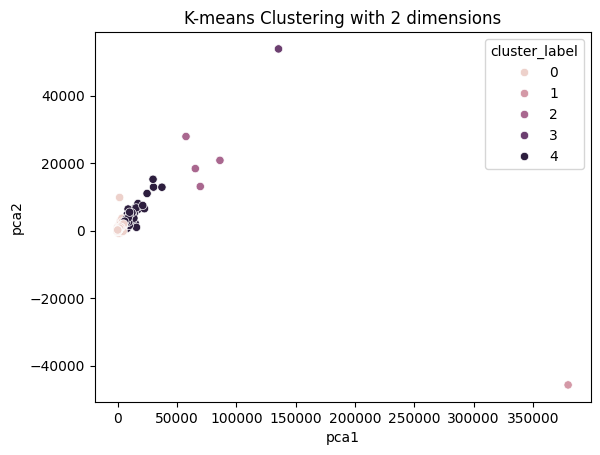

In [ ]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
import sklearn
from sklearn.decomposition import PCA

import seaborn as sns
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(df2)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df2['cluster_label'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [ ]:
import pandas as pd
reduced_data

array([[-177.1372178 ,  -12.50868005],
       [-234.65005156,  -53.20264239],
       [ -46.29168365,   79.66191146],
       ...,
       [-123.17384686,  -54.39349123],
       [ -29.84219272,  189.86766356],
       [ -39.24710425,  175.77642783]])

# CLUSTERING ON 2D data which is obtained by minimal values+interpolation+PCA

In [ ]:
#here i will apply above KMEANS CLUSTERING code once again as it is
#then will go to LOF directly
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
newdata=pd.read_csv('2 dimensions for min+interpolated by PCA.csv')

In [ ]:
newdf=newdata
newdata.head()

,Unnamed: 0,Principal Component 1,Principal Component 2
0,0,-0.8430,-0.222
1,1,-1.1600,-0.400
2,2,0.0441,0.902
3,3,-0.8260,-0.565
4,4,-2.0000,-0.920


In [ ]:
new_inertia_values = [] # Create a list to store inertia values for different numbers of clusters
# Try different values of k (e.g., 1-10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(newdf)
    new_inertia_values.append(kmeans.inertia_)
new_inertia_values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[4496210.359249498,
 1828084.380889395,
 710142.3908460886,
 437623.9025251402,
 229378.28936377552,
 152507.70551628363,
 111369.42722120807,
 88518.89055454136,
 72691.24565830689,
 62946.45825542225]

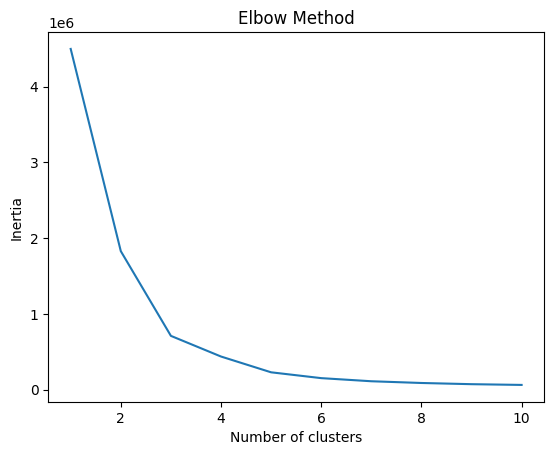

In [ ]:
# Plot the inertia values against the number of clusters
plt.plot(range(1, 11), new_inertia_values)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()
# Look for the "elbow" point in the plot,
# where the inertia starts decreasing less rapidly. number of clusters =4

In [ ]:
k=5
kmeans = KMeans(n_clusters=k, init="k-means++") #kmeans object
kmeans.fit(newdf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
cluster_labels = kmeans.labels_
cluster_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
newdf['cluster_label'] = kmeans.labels_
newdf

,Principal Component 1,Principal Component 2,cluster_label
0,-0.8430,-0.222,0
1,-1.1600,-0.400,0
2,0.0441,0.902,0
3,-0.8260,-0.565,0
4,-2.0000,-0.920,0
...,...,...,...
8108,0.2260,1.450,0
8109,-2.0100,-0.940,0
8110,-0.6090,0.414,0
8111,0.4330,2.560,0


In [ ]:
# Assuming you have a KMeans object named kmeans fitted to your data
cluster_centers = kmeans.cluster_centers_

# Display the cluster centers
print(cluster_centers)
import pandas as pd


[[ 4.49070588e+01  2.34421176e+01  4.00000000e+00]
 [ 1.58000000e+03 -4.14000000e+02  1.00000000e+00]
 [ 7.56000000e+02  4.38000000e+02  3.00000000e+00]
 [-9.92659691e-01 -3.29849239e-01  1.63064007e-15]
 [ 3.00833333e+02  1.04683333e+02  2.00000000e+00]]


In [ ]:
newc0 = newdf.query(f"{'cluster_label'} == {0}")
newc1 = newdf.query(f"{'cluster_label'} == {1}")
newc2 = newdf.query(f"{'cluster_label'} == {2}")
newc3 = newdf.query(f"{'cluster_label'} == {3}")
newc4 = newdf.query(f"{'cluster_label'} == {4}")

In [ ]:
newc3
newc3.to_csv('newc3.csv', index=False)

In [ ]:
newc1
newc1.to_csv('newc1.csv', index=False)

In [ ]:
newc0
newc0.to_csv('newc0.csv', index=False)

In [ ]:
newc2
newc2.to_csv('newc2.csv', index=False)

In [ ]:
newc4
newc4.to_csv('newc4.csv', index=False)

In [ ]:
#c1,c2,c3 goes to outlier set
#outliers also go to outlier

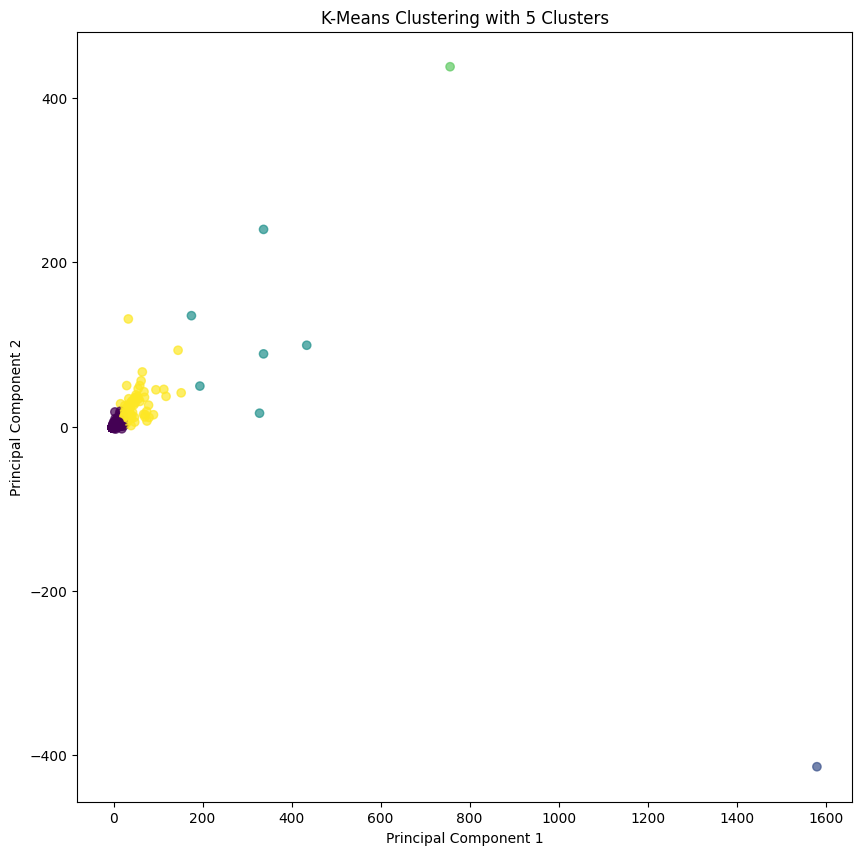

In [ ]:
features_to_plot = ['Principal Component 1', 'Principal Component 2']
plt.figure(figsize=(10, 10))  # Adjust figure size as needed
plt.scatter(newdf[features_to_plot[0]], newdf[features_to_plot[1]], c=newdf['cluster_label'], cmap='viridis', alpha=0.7)
plt.xlabel(features_to_plot[0])
plt.ylabel(features_to_plot[1])
plt.title('K-Means Clustering with 5 Clusters')
plt.show()


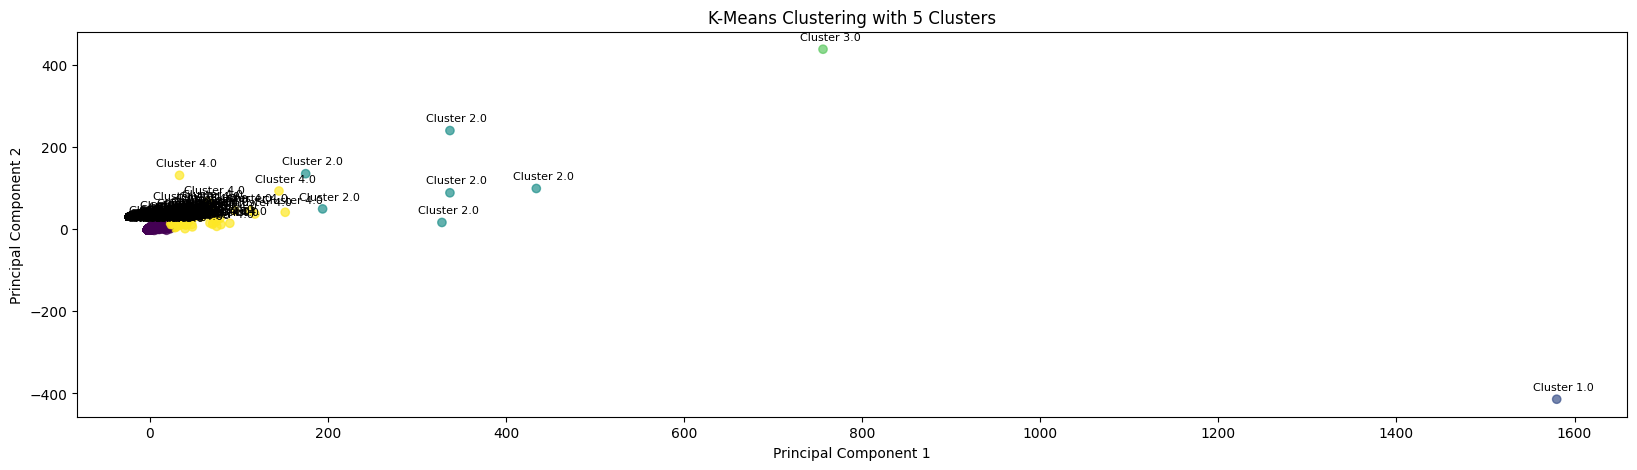

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.scatter(
    newdf['Principal Component 1'],
    newdf['Principal Component 2'],
    c=newdf['cluster_label'],
    cmap='viridis',  # Use a colormap for visual distinction
    alpha=0.7
)

# Add labels using markers or annotations
for i, row in newdf.iterrows():
    plt.annotate(f"Cluster {row['cluster_label']}", (row['Principal Component 1'], row['Principal Component 2']),
                 xytext=(5, 5),  # Adjust offset for better positioning
                 textcoords='offset points',
                 fontsize=8,  # Adjust font size
                 horizontalalignment='center',
                 verticalalignment='bottom')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with 5 Clusters')
plt.show()


Text(0, 0.5, 'PCA 2')

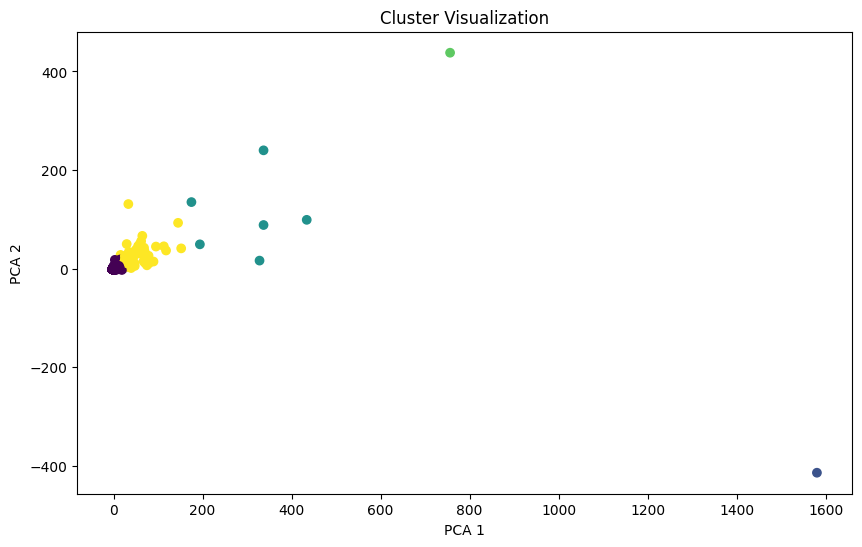

In [ ]:
# Visualize the cluster
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(newdf['Principal Component 1'], newdf['Principal Component 2'], c=newdf['cluster_label'], cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:
c4=pd.read_csv('newc4.csv')
c4.head()

,Principal Component 1,Principal Component 2,cluster_label
0,34.3,16.10,4
1,29.5,5.96,4
2,27.8,17.10,4
3,27.4,15.70,4
4,56.5,34.10,4


In [ ]:
# Identify outliers
from sklearn.preprocessing import StandardScaler

outliers = c4[kmeans.labels_ != kmeans.predict(c4)]
plt.scatter(outliers['Principal Component 1'], outliers['Principal Component 2'], color='red', label='Outliers')
plt.legend()

plt.show()

ValueError: operands could not be broadcast together with shapes (8113,) (85,) 

In [ ]:
#Calculate the Euclidean distance dist(xji, xj) betweenevery data sample xjiin this cluster and the clustercenter xj;
#IDENTIFY OUTLIERS
# Function to calculate Euclidean distance between a data sample and a cluster center
import numpy as np
def euclidean_distance(data_sample, cluster_center):
    return np.sqrt(np.sum((data_sample - cluster_center)**2))

# Calculate distances for each data sample
distances = []
for i in range(len(newdf)):
    data_sample = newdf.iloc[i]  # Access the ith data sample
    cluster_label = newdf.loc[i, 'cluster_label']  # Get its cluster label
    cluster_center = cluster_centers[cluster_label]  # Get the corresponding cluster center
    distance = euclidean_distance(data_sample, cluster_center)
    distances.append(distance)

# Analyze and utilize the distances as needed
# For example:
# - Add them as a new column to 'new_df'
newdf['distance_to_center'] = distances

# - Calculate average distance for each cluster
average_distances = np.zeros(len(np.unique(newdf['cluster_label'])))
for cluster_label in np.unique(newdf['cluster_label']):
    cluster_data = newdf[newdf['cluster_label'] == cluster_label]
    cluster_distances = cluster_data['distance_to_center']
    average_distances[cluster_label] = np.mean(cluster_distances)

# - Determine cutoff distances based on domain knowledge, statistical measures, or visualization
# ... (implement your chosen approach)
'''CODE EK BAAR RUN HO CHUKA HAI ISLIYE SECOND TIME ERROR DIYA YAHA.'''

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

In [ ]:
newdf

,Principal Component 1,Principal Component 2,cluster_label,distance_to_center
0,-0.8430,-0.222,0,51.662930
1,-1.1600,-0.400,0,52.025191
2,0.0441,0.902,0,50.366080
3,-0.8260,-0.565,0,51.805930
4,-2.0000,-0.920,0,53.007405
...,...,...,...,...
8108,0.2260,1.450,0,49.960487
8109,-2.0100,-0.940,0,53.025447
8110,-0.6090,0.414,0,51.166452
8111,0.4330,2.560,0,49.295078


In [ ]:
# Cutoff Distance (per cluster) = Standard Deviation (of distances to center) * Multiplier
# Calculate standard deviation for each cluster
cluster_stds = np.zeros(len(np.unique(newdf['cluster_label'])))
for cluster_label in np.unique(newdf['cluster_label']):
    cluster_data = newdf[newdf['cluster_label'] == cluster_label]
    cluster_distances = cluster_data['distance_to_center']
    cluster_stds[cluster_label] = np.std(cluster_distances)

# Define a multiplier for the standard deviation (adjust as needed)
multiplier = 3

# Calculate cutoff distances based on triple standard deviation
cutoff_distances = multiplier * cluster_stds

# Add cutoff distances as a new column to 'new_df' (optional)
newdf['cutoff_distance'] = cutoff_distances[newdf['cluster_label']]

#Identify data points exceeding their cutoff distance
outliers = newdf[newdf['distance_to_center'] > newdf['cutoff_distance']]
print(f"Number of outliers: {len(outliers)}")
outliers

Number of outliers: 8112


,Principal Component 1,Principal Component 2,cluster_label,distance_to_center,cutoff_distance
0,-0.8430,-0.222,0,51.662930,7.927704
1,-1.1600,-0.400,0,52.025191,7.927704
2,0.0441,0.902,0,50.366080,7.927704
3,-0.8260,-0.565,0,51.805930,7.927704
4,-2.0000,-0.920,0,53.007405,7.927704
...,...,...,...,...,...
8108,0.2260,1.450,0,49.960487,7.927704
8109,-2.0100,-0.940,0,53.025447,7.927704
8110,-0.6090,0.414,0,51.166452,7.927704
8111,0.4330,2.560,0,49.295078,7.927704


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(c0[['Principal Component 1', 'Principal Component 2','cluster_label']])
scaled_features.shape
c0.shape

(8020, 3)

In [ ]:
#now i will combine all the outliers into one single file
#c1,c2,c3 ko outliers me daal rahi
import pandas as pd

files = ['newc0.csv', 'newc2.csv', 'newc3.csv']

# Read each file into a DataFrame
dfs = [pd.read_csv(file) for file in files]

# Combine DataFrames (choose appropriate method based on your needs)
outliers_df = pd.concat(dfs, ignore_index=True)  # Concatenate without resetting indices
# or
outliers_df = pd.concat(dfs, ignore_index=True, sort=False)  # Concatenate without sorting

# Save the combined DataFrame as a new CSV file
outliers_df.to_csv('small clusters as outliers.csv', index=False)

In [ ]:
#i have a dataset with 8027 rows and 3 columns. Column 1 is feature 1, column 2 is feature 2. Column 3 is their k means cluster label as 0,1,2,3,4. Now i wish to find lof scores of

# LOF

In [ ]:
import pandas as pd
import numpy as np
lof_df=pd.read_csv('small clusters as outliers.csv')
# CLUSTER CENTERS ARE [[ 4.49070588e+01  2.34421176e+01  4.00000000e+00]
# [ 1.58000000e+03 -4.14000000e+02  1.00000000e+00]
# [ 7.56000000e+02  4.38000000e+02  3.00000000e+00]
# [-9.92659691e-01 -3.29849239e-01  1.63064007e-15]
# [ 3.00833333e+02  1.04683333e+02  2.00000000e+00]] '''

In [ ]:
lof_df

,Principal Component 1,Principal Component 2,cluster_label
0,-0.8430,-0.222,0
1,-1.1600,-0.400,0
2,0.0441,0.902,0
3,-0.8260,-0.565,0
4,-2.0000,-0.920,0
...,...,...,...
8022,434.0000,99.000,2
8023,337.0000,88.500,2
8024,337.0000,240.000,2
8025,194.0000,49.300,2


In [ ]:
outlier_df.to_csv('clof outliers ananya 23feb.csv', index=True)

In [ ]:
# Extract original data indices from outlier indices
outlier_indices_original = lof_df.index[sorted_outlier_indices].tolist()


In [ ]:
# Access specific data points
outlier_data = lof_df.iloc[outlier_indices_original]

# Print or use the outlier data as needed
print(outlier_data)


      Principal Component 1  Principal Component 2  cluster_label
8026                756.000                438.000              3
2213                 13.800                  2.400              0
2069                 -1.700                 -1.300              0
2104                  2.310                 -0.492              0
2110                  1.400                  2.360              0
...                     ...                    ...            ...
4687                 -1.800                  0.436              0
4690                 -2.180                 -0.356              0
4693                 -2.530                 -1.300              0
4757                 -2.530                 -1.290              0
47                   -0.432                 -0.665              0

[402 rows x 3 columns]


In [ ]:
outlier_data.to_csv('index and principal components of CLOF outliers.csv', index=False)

In [ ]:
import pandas as pd

# Read your data and desired values from CSV files
data = pd.read_csv('Flagged Principal Components.csv', index_col='Index')
desired_values = pd.read_csv('desired_values.csv')['Index']

# Filter the data based on the desired values
filtered_data = data[data.index.isin(desired_values)]

# Display the filtered data
print(filtered_data)


       Principal Component 1  Principal Component 2  FLAG
Index                                                    
47                    -0.432                 -0.665     1
54                     2.760                  2.980     1
81                    -0.742                  1.520     1
91                    -2.190                 -1.340     1
113                   -0.884                  0.550     1
...                      ...                    ...   ...
8022                  -1.970                 -1.110     0
8023                  -2.090                 -0.926     0
8024                  -1.160                 -0.224     0
8025                  -2.550                 -1.300     0
8026                  -2.550                 -1.300     0

[402 rows x 3 columns]


In [ ]:
filtered_data.to_csv('flag corresponding data.csv', index=True)

True positive: 225

False positive: 177

Accuracy: 0.5597

Precision: 0.5597

Recall: 1.0

F1-score: 0.7177
